In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.ticker as mticker

In [ ]:
data = pd.read_csv("imdb-movies-dataset.csv")
data = data.dropna()
print(data.info())
print(data.isnull().sum())


In [ ]:
data = data.drop("Poster", axis=1)
print(data)

In [87]:
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data['Year'] = data['Year'].astype(int)

Mean Rating: 6.549
Median Rating: 6.6
Mode Rating: 6.5


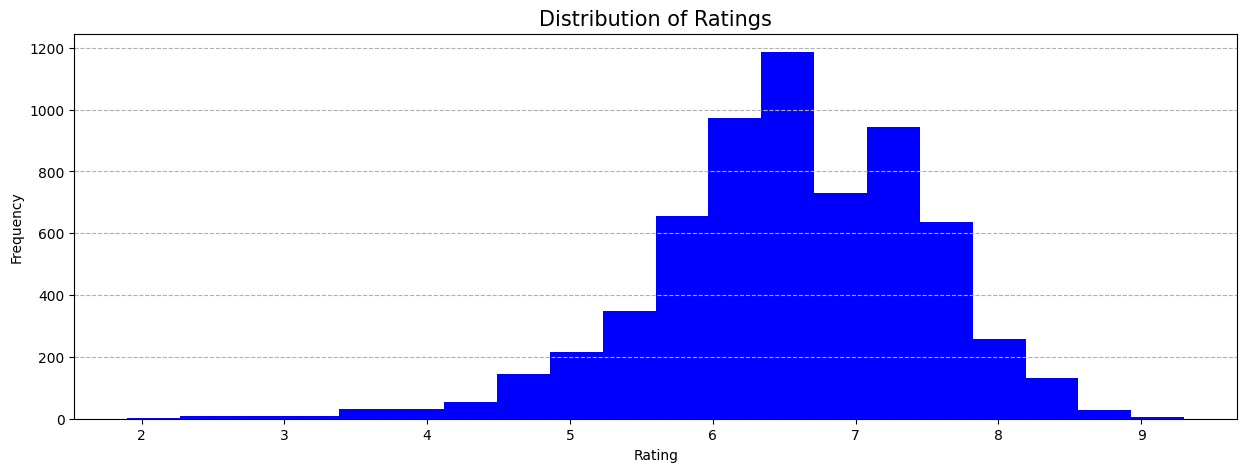

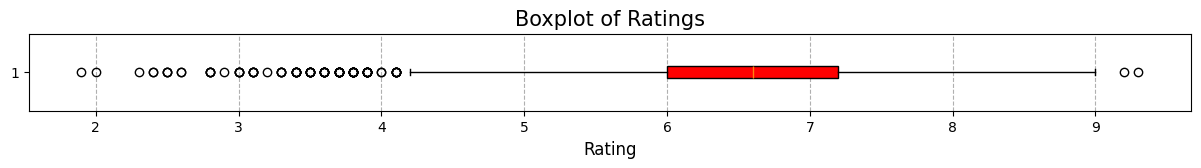

In [97]:
mean_rating = data['Rating'].mean()
median_rating = data['Rating'].median()
mode_rating = data['Rating'].mode().iloc[0]

print(f"Mean Rating: {round(mean_rating,3)}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")

plt.figure(figsize=(15, 5))
plt.hist(data['Rating'], bins=20, color='blue')
plt.title('Distribution of Ratings', fontsize=15)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')

plt.show()

plt.figure(figsize=(15, 1))
plt.boxplot(data['Rating'], vert=False, patch_artist=True, boxprops=dict(facecolor='red', color='black'))
plt.title('Boxplot of Ratings', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.grid(axis='x', linestyle='--')

plt.show()

The distribution of the ratings is negatively skewed. Majority of the ratings are between 6 and 7.

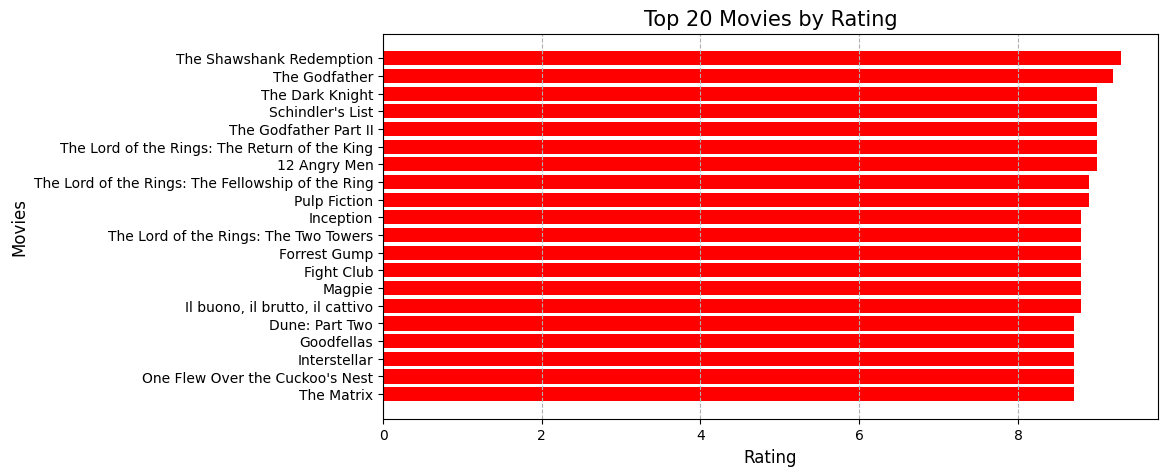

In [98]:
topMovies = data.sort_values(by='Rating', ascending=False).head(20)
plt.figure(figsize=(10, 5))
plt.barh(topMovies['Title'], topMovies['Rating'], color='red')
plt.title('Top 20 Movies by Rating', fontsize=15)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Movies', fontsize=12)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--')
plt.show()

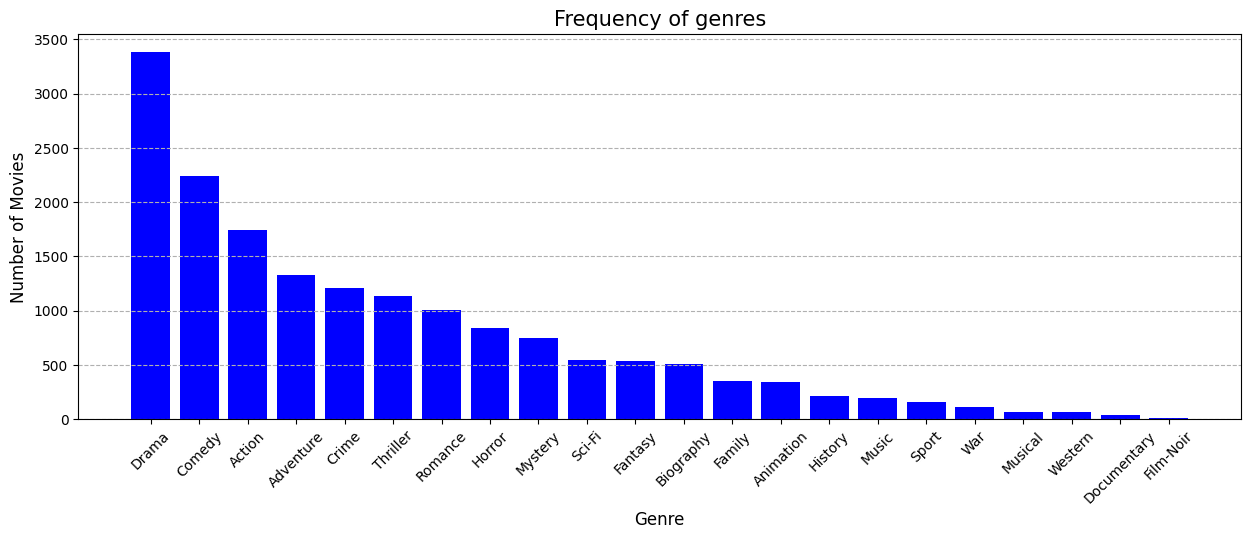

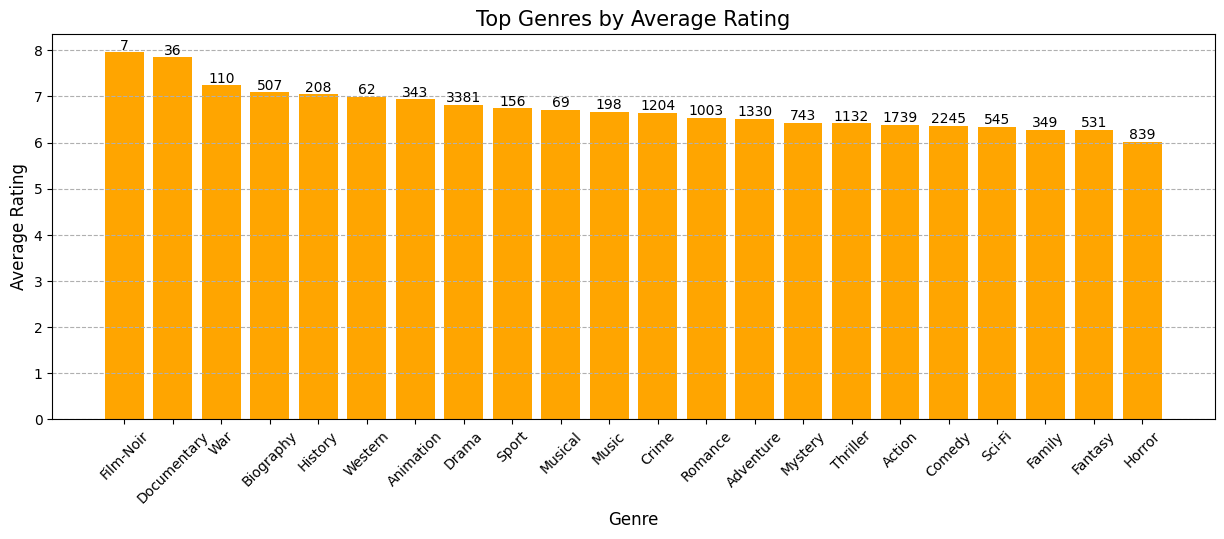

In [99]:
allGenres = data['Genre'].str.split(', ').explode()
genre = Counter(allGenres)
top_genres = genre.most_common(25)
genre_df = pd.DataFrame(top_genres, columns=['Genre', 'Count'])

plt.figure(figsize=(15, 5))
plt.bar(genre_df['Genre'], genre_df['Count'], color='blue')
plt.title('Frequency of genres', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


genres = data.assign(Genre=data['Genre'].str.split(', ')).explode('Genre')
genreAvgRating = genres.groupby('Genre')['Rating'].mean()
genreCount = genres['Genre'].value_counts()
topGenres = genreAvgRating.sort_values(ascending=False).head(25)
topGenreCount = genreCount[topGenres.index]  
plt.figure(figsize=(15, 5))
bars = plt.bar(topGenres.index, topGenres.values, color='orange')

for bar, count in zip(bars, topGenreCount):
    plt.text(bar.get_x() + bar.get_width() / 2,  
             bar.get_height(),  
             str(count),  
             ha='center', va='bottom', fontsize=10, color='black')

plt.title('Top Genres by Average Rating', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()



The bar graph shows the average rating of movies across various genres and also displays the number of movies within each genre. Film-Noir scores the highest average rating, while Horror scores the lowest. Genres like Documentary and War also have high ratings but have fewer films compared to genres like Comedy, Action, and Family, which have lower average ratings but a significantly larger movie count. This suggests that the bar graph reveals a negative correlation between average rating and movie count. This means that while unpopular genres may less movies but consistently high ratings, popular genres may include a greater number of lower-rated films, which negatively impacts the average rating.

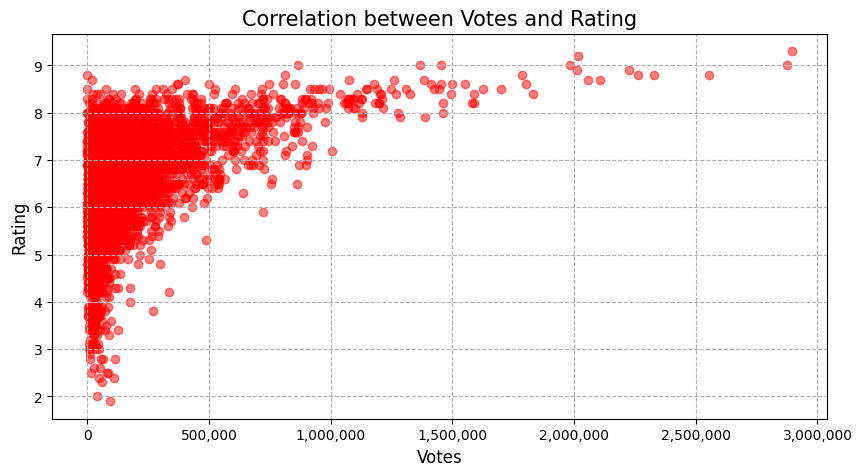

In [100]:
plt.figure(figsize=(10, 5))
plt.scatter(data['Votes'], data['Rating'], color='red', alpha=0.5)
plt.title('Correlation between Votes and Rating', fontsize=15)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True, linestyle='--')
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  

plt.show()


The scatter plot shows that movies with more votes have significantly higher ratings. This suggests a positive correlation between number of votes and motive ratings.

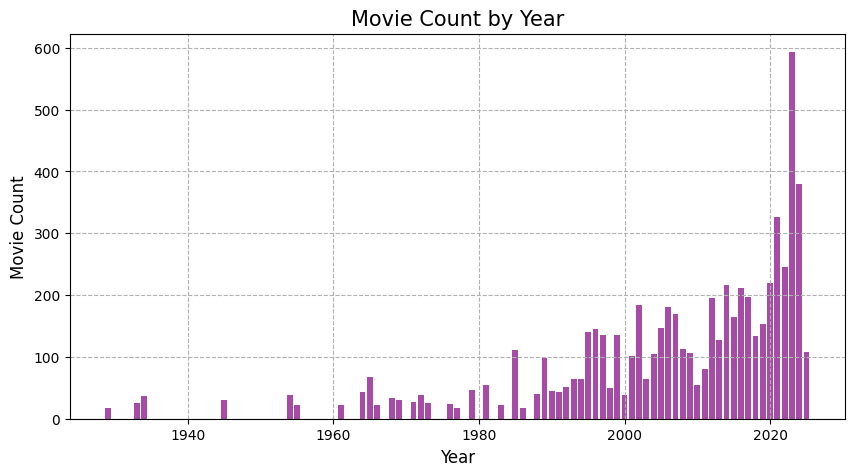

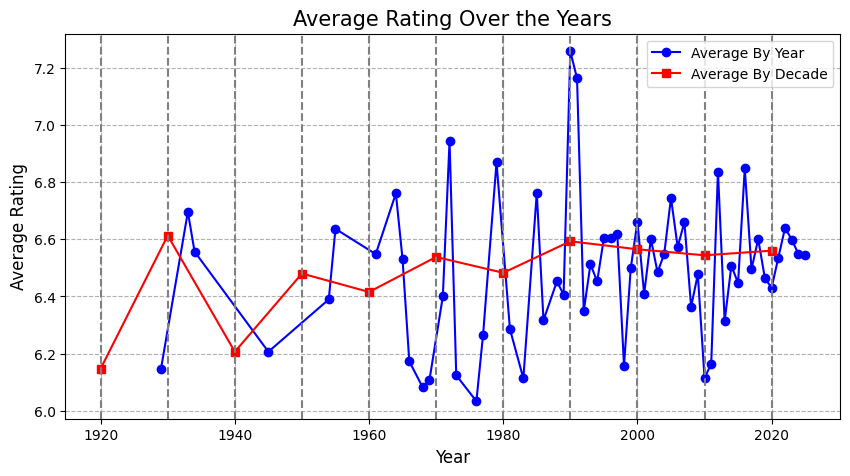

In [101]:
avgRatingbyYear = data.groupby('Year')['Rating'].mean()
movieCountByYear = data.groupby('Year')['Rating'].count()  
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(movieCountByYear.index, movieCountByYear.values, color='purple', alpha=0.7)
ax.set_title('Movie Count by Year', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Movie Count', fontsize=12)
ax.grid(True, linestyle='--')

plt.show()

data['Decade'] = (data['Year'] // 10) * 10
avgRatingbyDecade = data.groupby('Decade')['Rating'].mean()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(avgRatingbyYear.index, avgRatingbyYear.values, marker='o', linestyle='-', color='blue', label='Average By Year')
ax.plot(avgRatingbyDecade.index, avgRatingbyDecade.values, marker='s', linestyle='-', color='red', label='Average By Decade')

for decade in avgRatingbyDecade.index:
    ax.axvline(x=decade, color='gray', linestyle='--')

ax.set_title('Average Rating Over the Years', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Rating', fontsize=12)
ax.grid(True, linestyle='--')
ax.legend()

plt.show()





The line graph shows that the average movie rating over the years is between 6 and 7, with 1990 and 1991 boasting relatively high average ratings